In [45]:
# ENVIRONNEMENT
import os
import pandas as pnd
import math 
import numpy as np
from numpy import loadtxt
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.markers
from matplotlib import pyplot
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
import random


from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import Pipeline 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.externals import joblib
from sklearn import preprocessing
from sklearn.preprocessing import normalize 
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.grid_search import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


In [29]:
# IMPORTATION
os.chdir("C:/Users/charl/Desktop/Final/Final")
# os.chdir("C:/Users/mottierm/Documents/Perso/Scoring/Data")
df = pnd.read_csv("auto5_d.csv",sep=",", index_col = False)
df = df.drop('Unnamed: 0',1) 
df.head(5)

df_original = pnd.read_csv("ResiliationContratAuto.csv",sep=";", index_col = False,encoding = "UTF-8")

C:\Users\charl\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
df_original.columns

Index(['NO_AFR', 'IDECON', 'CD_AGT', 'CDPRGES', 'DTDBUCON', 'DTEFTMVT',
       'MTPAATTC', 'AUTO4R', 'NOCLIGES', 'NUMFOY', 'NIVBM', 'MTPAAREF',
       'CDMCE', 'NBCTRES', 'CLIACTIF', 'U', 'CONTRAT', 'ETAT', 'COEFCOMM',
       'COEFPFLT', 'CRM'],
      dtype='object')

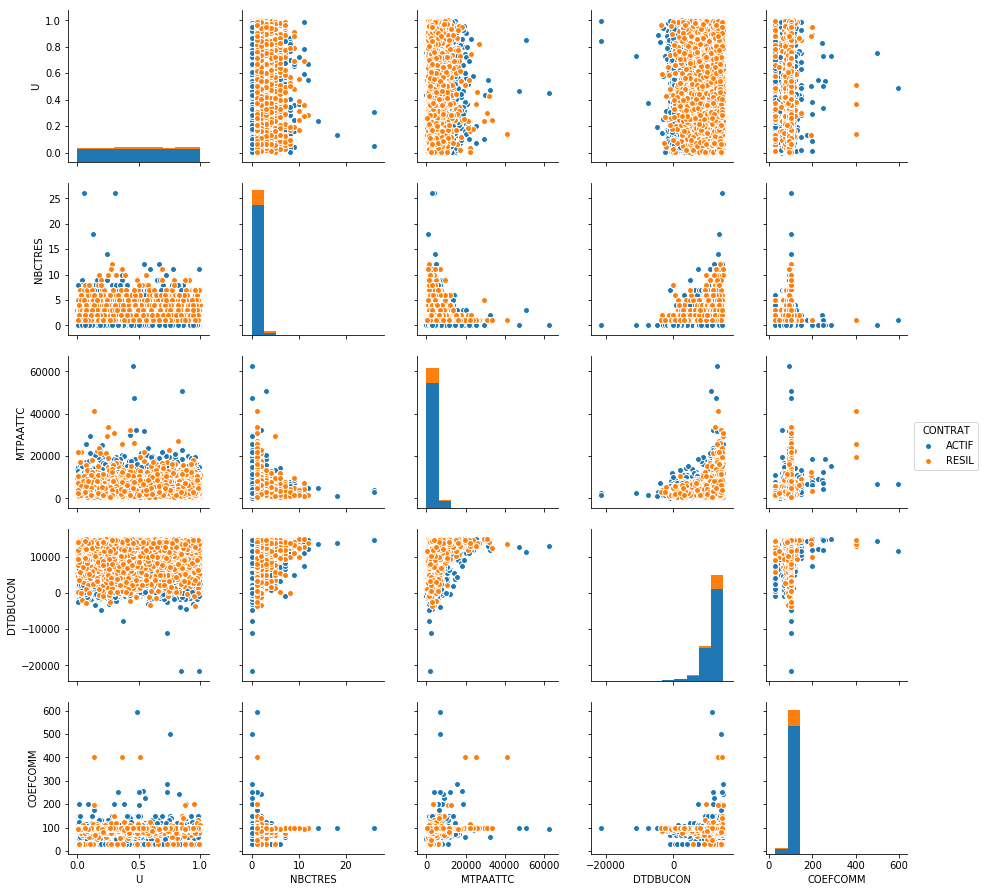

In [41]:
# dernière visualisation pour avoir une idée comportementale - choisir les meilleures variables 
df_original = df_original.dropna(axis=1)
g = sns.pairplot(df_original[['U',"NBCTRES","MTPAATTC","DTDBUCON",'COEFCOMM',"CDMCE",'CONTRAT']],hue='CONTRAT',diag_kind="hist")
g

## PARTIE III - MODELISATION

In [ ]:
Nous allons procéder à quatre approches dans cette section pour faire nos algorithmes : 
   
A - la première où nous utiliserons les variables du XGBOOST : df_xg 
B - la deuxième à partir de regression avec pénalisation sur les variables : df
C - La troisième par d autres methodes de selections des variables : df
 

D ================================  CONCLUSION DU MEILLEUR MODELE DANS CHAQUE PARTIE ========================================
    
    
E - Combinaison de deux / trois meilleurs modeles pour garantir le maximum de fiabilité


WARNING : le nombre de contrat resilié par rapport au actif est disproportionné ==> KFOLD stratifié

#### Constitution de l'échantillon representative

In [42]:
# on separe en X / Y la base globale
df_X = df[['I_MTPAAREF', 'I_COEFCOMM', 'I_COEFPFLT', 'I_CRM',
       'o_age_circulation_veh', 'o_age_contrat', 'o_age_indi', 'o_age_permis',
       'I_U', 'I_MTPAATTC', 'I_S_2_N', 'I_S_3_N', 'I_S_1_N', 'I_S_0_N',
       'I_S_3_O', 'I_S_2_O', 'I_S_1_O', 'I_S_0_O', 'I_NBCTRES','I_NBCTACT', 'I_AU4R', 'I_MH', 'I_DI', 'I_SA', 'I_IV',
       'I_RESAU4R', 'I_RESMH', 'I_RESSA', 'I_RESIV','I_RESDI', 'o_s_n', 'o_s_o', 'o_nb_contrat_res', 
       'o_count_NO_AFR', 'o_count_IDECON', 'o_count_NOCLIGES',
       'o_count_NUMFOY','I_RN_VL_VH.1', 'I_RN_VL_VH.2', 'I_RN_VL_VH.3', 'I_RN_VL_VH.4',
       'I_RN_VL_VH.5', 'I_RN_VL_VH.6', 'I_RN_VL_VH.7', 'I_RN_VL_VH.8',
       'I_RN_VL_VH.9', 'I_RN_VL_VH.10','I_RN_VL_VH.11', 'I_RN_VL_VH.12', 'I_RN_VL_VH.13',
       'I_RN_VL_VH.14', 'I_RN_VL_VH.15', 'I_RN_VL_VH.16', 'I_RN_VL_VH.17',
       'I_RN_VL_VH.18', 'I_CDUSGAUT.a', 'I_CDUSGAUT.b','I_CDUSGAUT.c', 'I_CDUSGAUT.d', 'I_CDUSGAUT.e',
       'I_CDUSGAUT.f', 'I_CDUSGAUT.g', 'I_CD_FML.C', 'I_CD_FML.D',
       'I_CD_FML.E', 'I_CD_FML.R', 'I_CD_FML.S','I_CD_FML.T', 'I_CD_FML.Z', 'I_CDPRGES.a', 'I_CDPRGES.b',
       'I_MMJECHPP.1', 'I_MMJECHPP.2', 'I_MMJECHPP.3', 'I_MMJECHPP.4',
       'I_MMJECHPP.5', 'I_MMJECHPP.6','I_MMJECHPP.7', 'I_MMJECHPP.8', 'I_MMJECHPP.9',
       'I_MMJECHPP.10', 'I_MMJECHPP.11', 'I_MMJECHPP.12', 'I_PUI_TRE.C',
       'I_PUI_TRE.D', 'I_PUI_TRE.E', 'I_PUI_TRE.G','I_PUI_TRE.I', 'I_PUI_TRE.K', 'I_PUI_TRE.T',
       'I_PUI_TRE.W', 'I_PUI_TRE.X', 'I_PUI_TRE.Y', 'I_PUI_TRE.Z', 'I_CDMCE.a',
       'I_CDMCE.b', 'I_CD_SEX.a','I_CD_SEX.b', 'I_REGION.AU', 'I_REGION.MM', 'I_REGION.NE',
       'I_REGION.OU', 'I_REGION.PA', 'I_REGION.RA', 'I_REGION.SO', 'I_MTPAATTC2.a', 'I_MTPAATTC2.b', 'I_MTPAATTC2.c',
       'I_MTPAATTC2.d', 'I_MTPAATTC2.e', 'I_CRM2.c', 'I_CRM2.d', 'I_COEFPFLT_D.a', 'I_COEFPFLT_D.b',
       'I_COEFPFLT_D.c', 'o_age_indi_d.a', 'o_age_indi_d.b', 'o_age_indi_d.c',
       'o_age_circulation_veh_d.a', 'o_age_circulation_veh_d.b',
       'o_age_circulation_veh_d.c', 'o_age_circulation_veh_d.d',
       'o_age_circulation_veh_d.e', 'o_age_contrat_d.a', 'o_age_contrat_d.b',
       'o_age_contrat_d.c', 'o_age_permis_d.a', 'o_age_permis_d.b',
       'o_age_permis_d.c', 'o_age_permis_d.d', 'o_duree_anciennete_d.a','o_duree_anciennete_d.b',
       'o_duree_anciennete_d.c', 'o_duree_anciennete_d.d', 'I_CDMARVEH2.a',
       'I_CDMARVEH2.b', 'I_CDMARVEH2.c', 'I_CDMARVEH2.d', 'I_DEPT2.a',
       'I_DEPT2.b', 'I_DEPT2.c','I_DEPT2.d', 'I_LBMDLVH2.a', 'I_LBMDLVH2.b',
       'I_LBMDLVH2.c', 'I_LBMDLVH2.d', 'o_marque.a', 'o_marque.b',
       'o_marque.c', 'o_marque.d']]


# a supprimer'I_MOTIFRSL.0', 'I_MOTIFRSL.1', 'I_MOTIFRSL.2', 'I_MOTIFRSL.9','I_MOTIFRSL.a', I_contrat, 
# nous supprimer MOTIFRSL car elle est crée post résilié donc ne peut pas etre utilisée en explicative
df_y = df[['Y']]

X = df_X.values
y = df_y.values
y =  y.ravel()

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=123) # test_size=0.3 thus TRAIN_size =0.7 OR 70% 
sss.get_n_splits(X, y)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# => tout nos modèles seront testés sur les memes echantillons afin de garantir une comparaison significative

(63172, 150)
(63172,)
(27075, 150)
(27075,)


In [4]:
np.unique(y_test, return_counts=True)
# ===> parfait, nous avons bien dans chacune des parties : 88%actifs / 12% inactifs

(array([0, 1], dtype=int64), array([24036,  3039], dtype=int64))

In [5]:
np.unique(y_train, return_counts=True)
# ===> parfait, nous avons bien dans chacune des parties : 88%actifs / 12% inactifs

(array([0, 1], dtype=int64), array([56081,  7091], dtype=int64))

## A - TYPE 1 : PAR SELECTION DE VARIABLES XGBOOST

C:\Users\charl\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


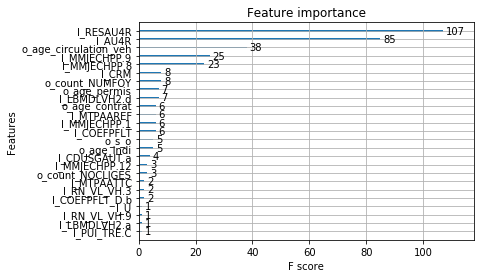

In [6]:
# SELECTION DES VARIABLES (sur X & Y donc sur toute base entière)

# scale_pos_weight => permet de lui donner le ratio des positifs/negatifs pour reequilibrer les classes 

clf = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, 
                      silent=False, objective='binary:logistic', nthread=-1, 
                      gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, 
                      colsample_bytree=1, colsample_bylevel=1, reg_alpha=0,
                     reg_lambda=1, scale_pos_weight=0.1, base_score=0.5, seed=0)

clf.fit(df_X, df_y)
plot_importance(clf,max_num_features = 25)

In [43]:
# le split kfold nous a fait passer les X en liste => nous devons donc repasser en dataframe puis renommer les colonnes 
X_train = pnd.DataFrame(X_train)
X_train.columns = df_X.columns

X_test = pnd.DataFrame(X_test)
X_test.columns = df_X.columns


# je garde donc uniquement les 25 variables d'importances du xg-boost
X_train_xg = X_train[["I_RESAU4R","I_AU4R","o_age_circulation_veh","I_MMJECHPP.9","I_MMJECHPP.8","I_CRM",
                       "o_count_NUMFOY","o_age_permis","o_age_contrat","I_LBMDLVH2.d","I_MTPAAREF", "I_COEFPFLT", "I_MMJECHPP.1",
                      "o_s_o","I_U","o_age_indi","I_CDUSGAUT.a","I_MMJECHPP.12","o_count_NOCLIGES","I_RN_VL_VH.3","I_COEFPFLT_D.b", 
                      "I_RN_VL_VH.9","I_LBMDLVH2.a","I_PUI_TRE.C"]]



X_test_xg =  X_test[["I_RESAU4R","I_AU4R","o_age_circulation_veh","I_MMJECHPP.9","I_MMJECHPP.8","I_CRM",
                       "o_count_NUMFOY","o_age_permis","o_age_contrat","I_LBMDLVH2.d","I_MTPAAREF", "I_COEFPFLT", "I_MMJECHPP.1",
                      "o_s_o","I_U","o_age_indi","I_CDUSGAUT.a","I_MMJECHPP.12","o_count_NOCLIGES","I_RN_VL_VH.3","I_COEFPFLT_D.b", 
                      "I_RN_VL_VH.9","I_LBMDLVH2.a","I_PUI_TRE.C"]]
    

#bien que I_MTPAATTC apparait, je le retire pour eviter la multicolinearité avec I_MTPAAREF
#print(X_train_xg.shape,X_test_xg.shape,Y_train.shape,Y_test.shape)

### MODELE 1.1 - Regression logistique

In [8]:
# Regression logistique après avoir optimisé manuellement 
logreg_xgboost = LogisticRegression(penalty = "l1",class_weight='balanced', tol=0.0001,max_iter = 500)
logreg_xgboost.fit(X_train_xg, y_train)
log_y_pred = logreg_xgboost.predict(X_test_xg)
scores = cross_val_score(logreg_xgboost,X_test,y_test,cv=5,scoring='accuracy')

print("===================== MODELE 1.1 REG LOGISTIQUE ===============")
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))    
print("ROC : ",metrics.roc_auc_score(y_test, log_y_pred)) 
print("precision : ",metrics.precision_score(y_test, log_y_pred)) 
print("recall : ",metrics.recall_score(y_test, log_y_pred)) 
print("cohen kappa : ",metrics.cohen_kappa_score(y_test, log_y_pred)) 

#class_weight='balanced' permet de reequilibrer les classes

===================== MODELE 1.1 REG XGBOOST ===============
Accuracy: 0.94 (+/- 0.01)
ROC :  0.9453337064163544
precision :  0.6153685092127303
recall :  0.9670944389601843
cohen kappa :  0.7127326415059707


### MODELE 1.2 - RANDOM FOREST

In [9]:
# Random forest avec parametrisation manuelle
rf_clf = RandomForestClassifier(n_estimators=120,class_weight='balanced',criterion="gini")
rf_clf.fit(X_train_xg, y_train)
rf_pred_test = rf_clf.predict(X_test_xg)
scores = cross_val_score(rf_clf,X_test,y_test,cv=5,scoring='accuracy')

print("===================== MODELE 1.2 RANDOM FOREST ===============")
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))    
print("ROC : ",metrics.roc_auc_score(y_test, rf_pred_test)) 
print("precision : ",metrics.precision_score(y_test, rf_pred_test)) 
print("recall : ",metrics.recall_score(y_test, rf_pred_test)) 
print("cohen kappa : ",metrics.cohen_kappa_score(y_test, rf_pred_test)) 

===================== MODELE 1.2 RANDOM FOREST ===============
Accuracy: 0.96 (+/- 0.00)
ROC :  0.8629748491773692
precision :  0.9372367312552654
recall :  0.7321487331359
cohen kappa :  0.8026666272502844


In [10]:
# recherche des best parameters
# important : la parametrisation ce fait sur le Random forest avec Class_weight et non sans parametres

rf_clf = RandomForestClassifier(class_weight='balanced')
param_grid = { "n_estimators"  : [120,250, 500],
               "criterion" : ["gini", "entropy"],
               "max_features"  : ['auto', 'sqrt', 'log2']}

scorer = make_scorer(recall_score, pos_label=1)
grid_search = GridSearchCV(rf_clf, param_grid, n_jobs=1, cv=3, scoring=scorer, verbose=50)
grid_search.fit(X_train_xg, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] criterion=gini, max_features=auto, n_estimators=120 .............
[CV]  criterion=gini, max_features=auto, n_estimators=120, score=0.700085 -   6.8s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s
[CV] criterion=gini, max_features=auto, n_estimators=120 .............
[CV]  criterion=gini, max_features=auto, n_estimators=120, score=0.732657 -   6.8s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.6s remaining:    0.0s
[CV] criterion=gini, max_features=auto, n_estimators=120 .............
[CV]  criterion=gini, max_features=auto, n_estimators=120, score=0.728735 -   6.7s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.4s remaining:    0.0s
[CV] criterion=gini, max_features=auto, n_estimators=250 .............
[CV]  criterion=gini, max_features=auto, n_estimators=250, score=0.709814 -  13.6s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   34.1s remaining:    0.0s
[CV

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [120, 250, 500], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(recall_score, pos_label=1), verbose=50)

In [11]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 500}


In [12]:
# Random forest avec parametrisation automatisée
rf2_clf = RandomForestClassifier(n_estimators=500,class_weight='balanced',criterion= 'entropy', max_features= 'log2')
rf2_clf.fit(X_train_xg, y_train)
rf2_pred_test = rf2_clf.predict(X_test_xg)
scores = cross_val_score(rf2_clf,X_test,y_test,cv=5,scoring='accuracy')

print("===================== MODELE 1.2 RANDOM FOREST AUTOMATISEE ===============")
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))    
print("ROC : ",metrics.roc_auc_score(y_test, rf2_pred_test)) 
print("precision : ",metrics.precision_score(y_test, rf2_pred_test)) 
print("recall : ",metrics.recall_score(y_test, rf2_pred_test)) 
print("cohen kappa : ",metrics.cohen_kappa_score(y_test, rf2_pred_test)) 

===================== MODELE 1.2 RANDOM FOREST AUTOMATISEE ===============
Accuracy: 0.96 (+/- 0.00)
ROC :  0.8632433876332588
precision :  0.9392405063291139
recall :  0.7324777887462981
cohen kappa :  0.8037713845211152


### MODELE 1.3 - SVM 

In [13]:
# SVM de base
SVC_clf = svm.SVC(class_weight='balanced')
SVC_clf.fit(X_train_xg, y_train)
SVC_pred_test = SVC_clf.predict(X_test_xg)
scores = cross_val_score(SVC_clf,X_test,y_test,cv=5,scoring='accuracy')

print("===================== MODELE 1.3 SVM ===============")
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))    
print("ROC : ",metrics.roc_auc_score(y_test, SVC_pred_test)) 
print("precision : ",metrics.precision_score(y_test, SVC_pred_test)) 
print("recall : ",metrics.recall_score(y_test, SVC_pred_test)) 
print("cohen kappa : ",metrics.cohen_kappa_score(y_test, SVC_pred_test)) 

===================== MODELE 1.3 SVM ===============
Accuracy: 0.93 (+/- 0.01)
ROC :  0.8870037737076516
precision :  0.6403641881638846
recall :  0.8331688055281342
cohen kappa :  0.6840489580038815


In [ ]:
# SVM avec parametres automatisé - lancement très long
#SVC2_clf = svm.SVC(class_weight='balanced')
#tuned_parameters = {'kernel': ('linear', 'rbf'), 'C':[1, 10, 10]}
#SVC2_clf = GridSearchCV(SVC2_clf, tuned_parameters, n_jobs=1, cv=3)
#SVC2_clf.fit(X_train_xg, y_train)
#print(SVC2_clf.best_params_)

#SVC2_clf = svm.SVC(class_weight='balanced')
#SVC2_clf.fit(X_train, y_train)                     
#SVC2_pred_test = SVC_clf.predict(X_test_xg)
#scores = cross_val_score(SVC2_clf,X_test,y_test,cv=5,scoring='accuracy')

#print("===================== MODELE 1.3 SVM automatisé ===============")
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))    
#print("ROC : ",metrics.roc_auc_score(y_test, SVC2_pred_test)) 
#print("precision : ",metrics.precision_score(y_test, SVC2_pred_testSVC2_pred_test)) 
#print("recall : ",metrics.recall_score(y_test, SVC2_pred_test)) 
#print("cohen kappa : ",metrics.cohen_kappa_score(y_test, SVC2_pred_test)) 

### Comparaison des 4 modeles section A

In [20]:
#===================== MODELE 1.1 REGRESSION LOGISTIQUE ===============

roc11 = metrics.roc_auc_score(y_test, log_y_pred)
prec11 = metrics.precision_score(y_test, log_y_pred)
recal11 = metrics.recall_score(y_test, log_y_pred)
kappa11 = metrics.cohen_kappa_score(y_test, log_y_pred) 

#===================== MODELE 1.2 RANDOM FOREST =======================
roc12 = metrics.roc_auc_score(y_test, rf_pred_test) 
prec12 = metrics.precision_score(y_test, rf_pred_test)
recal12 = metrics.recall_score(y_test, rf_pred_test)
kappa12 = metrics.cohen_kappa_score(y_test, rf_pred_test)

#===================== MODELE 1.2 RANDOM FOREST AUTOMATISEE ==============
    
roc13 = metrics.roc_auc_score(y_test, rf2_pred_test)
prec13 = metrics.precision_score(y_test, rf2_pred_test)
recal13 = metrics.recall_score(y_test, rf2_pred_test)
kappa13 = metrics.cohen_kappa_score(y_test, rf2_pred_test)

#===================== MODELE 1.3 SVM ====================================
    
roc14 = metrics.roc_auc_score(y_test, SVC_pred_test) 
prec14 = metrics.precision_score(y_test, SVC_pred_test)
recal14 = metrics.recall_score(y_test, SVC_pred_test)
kappa14 = metrics.cohen_kappa_score(y_test, SVC_pred_test)

In [33]:
d = {'metrics' : ["accuracy(5cv)","variance accucary","ROC","Precision","Recall","Kappa"],
     'Log': [0.94,0.00,roc11,prec11,recal11,kappa11], 
     'RF1': [0.96,0.01,roc12,prec12,recal12,kappa12], 
     'RF2': [0.96,0.00,roc13,prec13,recal13,kappa13],  
     'SVM': [0.93,0.01,roc14,prec14,recal14,kappa14]}

df_typeA = pnd.DataFrame(data=d)
df_typeA

,Log,RF1,RF2,SVM,metrics
0,0.940000,0.960000,0.960000,0.930000,accuracy(5cv)
1,0.000000,0.010000,0.000000,0.010000,variance accucary
2,0.945334,0.862975,0.863243,0.887004,ROC
3,0.615369,0.937237,0.939241,0.640364,Precision
4,0.967094,0.732149,0.732478,0.833169,Recall
5,0.712733,0.802667,0.803771,0.684049,Kappa


In [ ]:
# Recall & ROC a privilegier => on garde le log

## B - TYPE 2 : PAR PENALISATION SUR LA SELECTION DE VAR (all features)

In [27]:
# l1 : lasso / # l2 : Ridge (par défaut)
logreg1 = LogisticRegression(penalty='l1',class_weight='balanced')
logreg1.fit(X_train, y_train)
ccc

===================== MODELE 2.1 Lasso ===============
Accuracy: 0.94 (+/- 0.01)


NameError: name 'SVC2_pred_test' is not defined

In [29]:
print("===================== MODELE 2.1 Lasso ===============")
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))    
print("ROC : ",metrics.roc_auc_score(y_test, y_log_pred1)) 
print("precision : ",metrics.precision_score(y_test, y_log_pred1)) 
print("recall : ",metrics.recall_score(y_test, y_log_pred1)) 
print("cohen kappa : ",metrics.cohen_kappa_score(y_test, y_log_pred1))

===================== MODELE 2.1 Lasso ===============
Accuracy: 0.94 (+/- 0.01)
ROC :  0.9462660032655854
precision :  0.6299720490217158
recall :  0.9641329384666009
cohen kappa :  0.7246426118440414


In [30]:
# même modele mais avec automatisation des parametres
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], "n_jobs":[-1,1],"max_iter":[200,500,1000] }
clf1 = GridSearchCV(logreg1, param_grid)
clf1.fit(X_train, y_train)

C:\Users\charl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not

{'C': 10, 'max_iter': 200, 'n_jobs': -1}


NameError: name 'clf2' is not defined

In [31]:
print(clf1.best_params_) 

{'C': 10, 'max_iter': 200, 'n_jobs': -1}


In [32]:
# Regression logistique avec les meilleures parametres
logreg3 = LogisticRegression(penalty='l1', C=10, class_weight='balanced', max_iter = 200, n_jobs = -1)
logreg3.fit(X_train, y_train)
y_log_pred3 = logreg3.predict(X_test)
scores3 = cross_val_score(logreg3,X_test,y_test,cv=5,scoring='accuracy')

print("===================== MODELE 2.2 Lasso ===============")
print("Accuracy: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std() * 2))    
print("ROC : ",metrics.roc_auc_score(y_test, y_log_pred3)) 
print("precision : ",metrics.precision_score(y_test, y_log_pred3)) 
print("recall : ",metrics.recall_score(y_test, y_log_pred3)) 
print("cohen kappa : ",metrics.cohen_kappa_score(y_test, y_log_pred3))

C:\Users\charl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not

===================== MODELE 2.2 Lasso ===============
Accuracy: 0.94 (+/- 0.01)
ROC :  0.9465553438516132
precision :  0.6308652604390874
recall :  0.9644619940769991
cohen kappa :  0.7255357550169592


### Comparaison des 2 modeles de type B

In [34]:
print("===================== MODELE 2.1 Lasso ===============")
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))    
roc21 = metrics.roc_auc_score(y_test, y_log_pred1)
prec21 = metrics.precision_score(y_test, y_log_pred1)
recal21 = metrics.recall_score(y_test, y_log_pred1)
kappa21 = metrics.cohen_kappa_score(y_test, y_log_pred1)

print("===================== MODELE 2.2 Lasso ===============")
print("Accuracy: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std() * 2))    
roc22 = metrics.roc_auc_score(y_test, y_log_pred3)
prec22 = metrics.precision_score(y_test, y_log_pred3) 
recal22 = metrics.recall_score(y_test, y_log_pred3)
kappa22 = metrics.cohen_kappa_score(y_test, y_log_pred3)

===================== MODELE 2.1 Lasso ===============
Accuracy: 0.94 (+/- 0.01)
===================== MODELE 2.2 Lasso ===============
Accuracy: 0.94 (+/- 0.01)


In [35]:
d = {'metrics' : ["accuracy(5cv)","variance accucary","ROC","Precision","Recall","Kappa"],
     'Log21': [scores.mean(),scores.std(),roc21,prec21,recal21,kappa21], 
     'Log22': [scores3.mean(),scores3.std(),roc22,prec22,recal22,kappa22]}

df_typeB = pnd.DataFrame(data=d)
df_typeB

,Log21,Log22,metrics
0,0.936141,0.936399,accuracy(5cv)
1,0.002733,0.002884,variance accucary
2,0.946266,0.946555,ROC
3,0.629972,0.630865,Precision
4,0.964133,0.964462,Recall
5,0.724643,0.725536,Kappa


In [ ]:
# => Log22 meilleur

## C - TYPE 3 : Autres methodes de selection des variables

### MODELE 3.1 par l'option features_importances

In [54]:
# Passage en data frame pour facilier l'éxecution du code
X_train = pnd.DataFrame(X_train)
X_test = pnd.DataFrame(X_test)

X_train.columns = df_X.columns
X_test.columns = df_X.columns

In [66]:
### RF
rf_all = RandomForestClassifier(n_estimators=30,class_weight='balanced')
rf_all.fit(X_train, y_train)


rfe = pnd.DataFrame(rf_all.feature_importances_,
             index = X_train.columns,
             columns=['importance']).sort_values('importance',ascending=False)

rfe = rfe.iloc[1:25]

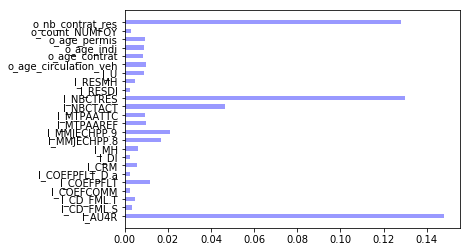

In [67]:
rects = plt.barh(rfe.index , rfe["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.show()

In [84]:
# Selection de variables avec l'option class_weight='balanced'
X_train_rf = X_train[["I_AU4R","I_NBCTRES","o_nb_contrat_res","I_NBCTACT","I_MMJECHPP.9","I_MMJECHPP.8","I_COEFPFLT",
                      "o_age_circulation_veh", "I_MTPAAREF","o_age_permis","I_U","o_age_contrat","o_age_indi","o_age_contrat",
                      "I_MH","I_CRM","I_CD_FML.T","I_RESMH","I_CD_FML.S","o_count_NUMFOY","I_DI","I_COEFPFLT_D.a","I_COEFCOMM"]]
                      
X_test_rf = X_test[["I_AU4R","I_NBCTRES","o_nb_contrat_res","I_NBCTACT","I_MMJECHPP.9","I_MMJECHPP.8","I_COEFPFLT",
                      "o_age_circulation_veh", "I_MTPAAREF","o_age_permis","I_U","o_age_contrat","o_age_indi","o_age_contrat",
                      "I_MH","I_CRM","I_CD_FML.T","I_RESMH","I_CD_FML.S","o_count_NUMFOY","I_DI","I_COEFPFLT_D.a","I_COEFCOMM"]]
                       
    
# Selection de variables option class_weight='none'
X_train_rf2 = X_train[["I_NBCTACT","I_RESAU4R","o_nb_contrat_res","I_NBCTRES","I_MMJECHPP.8","I_COEFPFLT","I_U","I_MMJECHPP.9",
                     "I_MTPAATTC","o_age_circulation_veh","o_age_indi","I_MH","o_age_permis","o_age_contrat","I_CRM",
                      "I_RESMH","I_DI","o_duree_anciennete_d.a","o_age_indi_d.a","o_s_n","I_COEFPFLT_D.a","I_COEFCOMM"]] 

X_test_rf2 = X_test[["I_NBCTACT","I_RESAU4R","o_nb_contrat_res","I_NBCTRES","I_MMJECHPP.8","I_COEFPFLT","I_U","I_MMJECHPP.9",
                     "I_MTPAATTC","o_age_circulation_veh","o_age_indi","I_MH","o_age_permis","o_age_contrat","I_CRM",
                      "I_RESMH","I_DI","o_duree_anciennete_d.a","o_age_indi_d.a","o_s_n","I_COEFPFLT_D.a","I_COEFCOMM"]] 



In [85]:
rf_all2 = RandomForestClassifier(n_estimators=120,class_weight='balanced',criterion="gini")
rf_all2.fit(X_train_rf, y_train)
rf_pred_all2_test = rf_all2.predict(X_test_rf)
scores_rf_all2 = cross_val_score(rf_all2,X_test_rf,y_test,cv=5,scoring='accuracy')

print("===================== MODELE 3.1 RANDOM FOREST class_weight='balanced' ===============")
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_rf_all2.mean(), scores_rf_all2.std() * 2))    
print("ROC : ",metrics.roc_auc_score(y_test, rf_pred_all2_test)) 
print("precision : ",metrics.precision_score(y_test, rf_pred_all2_test)) 
print("recall : ",metrics.recall_score(y_test, rf_pred_all2_test)) 
print("cohen kappa : ",metrics.cohen_kappa_score(y_test, rf_pred_all2_test)) 


===================== MODELE 3.1 RANDOM FOREST ===============
Accuracy: 0.96 (+/- 0.00)
ROC :  0.8472501432122956
precision :  0.949084412684234
recall :  0.6992431720960842
cohen kappa :  0.7847288312314131


In [87]:
rf_all3 = RandomForestClassifier(n_estimators=120,class_weight='balanced',criterion="gini")
rf_all3.fit(X_train_rf2, y_train)
rf_pred_all3_test = rf_all3.predict(X_test_rf2)
scores_rf_all3 = cross_val_score(rf_all2,X_test,y_test,cv=5,scoring='accuracy')

print("===================== MODELE 3.1 RANDOM FOREST class_weight='none' ===============")
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_rf_all3.mean(), scores_rf_all3.std() * 2))    
print("ROC : ",metrics.roc_auc_score(y_test, rf_pred_all3_test)) 
print("precision : ",metrics.precision_score(y_test, rf_pred_all3_test)) 
print("recall : ",metrics.recall_score(y_test, rf_pred_all3_test)) 
print("cohen kappa : ",metrics.cohen_kappa_score(y_test, rf_pred_all3_test)) 


===================== MODELE 3.1 RANDOM FOREST autres selection ===============
Accuracy: 0.96 (+/- 0.00)
ROC :  0.8519666411866241
precision :  0.8934594816947758
recall :  0.7147087857847977
cohen kappa :  0.7713367024332007


### Modele 3.2 selection par PCA

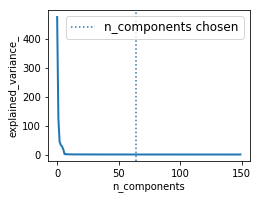

In [99]:
# necessite d'etre sous forme de liste
X_test = X_test.values 
X_train = X_train.values 


logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# Plot the PCA
pca.fit(X_train)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')


n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_train, y_train)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

In [101]:
PCA_pred_test = estimator.predict(X_test)
scores_PCA = cross_val_score(estimator,X_test,y_test,cv=5,scoring='accuracy')

print("===================== MODELE 3.2 PCA ===============")
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_PCA.mean(), scores_PCA.std() * 2))    
print("ROC : ",metrics.roc_auc_score(y_test, PCA_pred_test)) 
print("precision : ",metrics.precision_score(y_test, PCA_pred_test)) 
print("recall : ",metrics.recall_score(y_test, PCA_pred_test)) 
print("cohen kappa : ",metrics.cohen_kappa_score(y_test, PCA_pred_test)) 

===================== MODELE 3.2 PCA ===============
Accuracy: 0.96 (+/- 0.00)
ROC :  0.8767801119971901
precision :  0.8580337490829053
recall :  0.7696610727212899
cohen kappa :  0.7890568426621549


### Comparaison des modèles de type C

In [103]:
print("===================== MODELE 3.1 RANDOM FOREST class_weight='balanced'===============")
acc31 = scores_rf_all2.mean()
var31 = scores_rf_all2.std()     
roc31 = metrics.roc_auc_score(y_test, rf_pred_all2_test)
prec31 = metrics.precision_score(y_test, rf_pred_all2_test) 
recal31 = metrics.recall_score(y_test, rf_pred_all2_test)
kappa31 = metrics.cohen_kappa_score(y_test, rf_pred_all2_test) 

print("===================== MODELE 3.1 RANDOM FOREST class_weight='none' ===============")
acc32 = scores_rf_all3.mean()
var32 = scores_rf_all3.std()   
roc32 = metrics.roc_auc_score(y_test, rf_pred_all3_test)
prec32 = metrics.precision_score(y_test, rf_pred_all3_test)
recall32 = metrics.recall_score(y_test, rf_pred_all3_test)
kappa32 = metrics.cohen_kappa_score(y_test, rf_pred_all3_test)

print("===================== MODELE 3.2 PCA ===============")
acc33 = scores_PCA.mean()
var33 = scores_PCA.std()     
roc33 = metrics.roc_auc_score(y_test, PCA_pred_test) 
prec33 = metrics.precision_score(y_test, PCA_pred_test)
recall33 = metrics.recall_score(y_test, PCA_pred_test)
kappa33 = metrics.cohen_kappa_score(y_test, PCA_pred_test)

===================== MODELE 3.1 RANDOM FOREST ===============
===================== MODELE 3.1 RANDOM FOREST autres selection ===============
===================== MODELE 3.2 PCA ===============


In [107]:
d = {'metrics' : ["accuracy(5cv)","variance accucary","ROC","Precision","Recall","Kappa"],
     'RF1': [acc31,var31,roc31,prec31,recal31,kappa31], 
     'RF2': [acc32,var32,roc32,prec32,recall32,kappa32], 
     'PCA': [acc33,var33,roc33,prec33,recall33,kappa33]}

df_typeC = pnd.DataFrame(data=d)
df_typeC

,PCA,RF1,RF2,metrics
0,0.960074,0.963620,0.962992,accuracy(5cv)
1,0.002448,0.001968,0.001722,variance accucary
2,0.876780,0.853737,0.851967,ROC
3,0.858034,0.896099,0.893459,Precision
4,0.769661,0.717999,0.714709,Recall
5,0.789057,0.774728,0.771337,Kappa


In [ ]:
# => on choisi RF1

## D - Comparaison des 3 meilleurs modèles

In [119]:
print(df_typeA[['Log']])
print(df_typeB[['Log22']])
print(df_typeC[['RF1']])

        Log
0  0.940000
1  0.000000
2  0.945334
3  0.615369
4  0.967094
5  0.712733
      Log22
0  0.936399
1  0.002884
2  0.946555
3  0.630865
4  0.964462
5  0.725536
        RF1
0  0.963620
1  0.001968
2  0.853737
3  0.896099
4  0.717999
5  0.774728


In [125]:
tableRF1 = pnd.crosstab(y_test,rf_pred_all2_test)
tableLog = pnd.crosstab(y_test,log_y_pred)
tableLog22 = pnd.crosstab(y_test,y_log_pred3)
print("====== MATRIX for Log ===== ")
print(tableLog)
print("====== MATRIX for Log22 ===== ")
print(tableLog22)
print("====== MATRIX for RF1 ===== ")
print(tableRF1)

====== MATRIX for Log ===== 
col_0      0     1
row_0             
0      22199  1837
1        100  2939
====== MATRIX for Log22 ===== 
col_0      0     1
row_0             
0      22321  1715
1        108  2931
====== MATRIX for RF1 ===== 
col_0      0     1
row_0             
0      23783   253
1        857  2182


In [46]:
# ====> au vu de ces resultats, on garde le modele log par selection de variable xgboost
logreg_xgboost = LogisticRegression(penalty = "l1",class_weight='balanced', tol=0.0001,max_iter = 500)
logreg_xgboost.fit(X_train_xg, y_train)
probas = logreg_xgboost.predict_proba(X_test_xg)

In [51]:
probas = pnd.DataFrame(probas[:,1])
probas.head(10)

,0
0,0.006975
1,0.012234
2,0.016898
3,0.003919
4,0.013060
5,0.025697
6,0.004808
7,0.072407
8,0.955825
9,0.006650


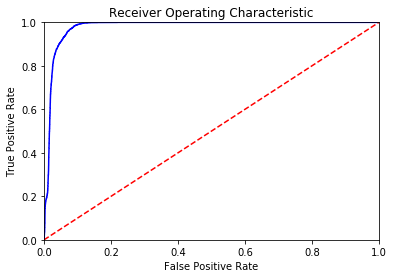

In [141]:
# création du score
fpr, tpr, threshold = roc_curve(y_test, probas[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [44]:
# la courbe ressemble fort à de l'overfitting, je relance le modèle avec 10kfolds et j'observe la courbe ROC

from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=10)
model = LogisticRegression(penalty = "l1",class_weight='balanced', tol=0.0001,max_iter = 500)
scoring = 'roc_auc'
results = model_selection.cross_val_score(model, df_X, df_y, cv=kfold, scoring=scoring)

C:\Users\charl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [148]:
model.predict_proba()

array([0.97688683, 0.97793756, 0.97629666, 0.97570281, 0.9770781 ,
       0.97657534, 0.97592454, 0.98085494, 0.98774858, 0.99638248])